In [1]:
#importing the necessary libraries needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,recall_score, roc_auc_score,f1_score,adjusted_rand_score, accuracy_score, normalized_mutual_info_score, precision_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from skimage.transform import resize

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


# Part 1: Data analysis and Bayes Net

In [4]:
#loading the noiseless datasets
X= np.load('smiley_dataset/smiley_X.npy')
Y= np.load('smiley_dataset/smiley_Y.npy')

In [5]:
print(X.shape)
print(Y.shape)

(204, 9, 9, 1)
(204,)


In [6]:
unique_Y, Y_count= np.unique(Y,return_counts=True)
## identifying and printing unique classes where Y represents the classes

for class_label, count in zip(unique_Y, Y_count):
    print('class:',class_label,"count:",count)
    ## where 0 is sad, 1 is neutral, 2 is happy

class: 0.0 count: 72
class: 1.0 count: 60
class: 2.0 count: 72


In [7]:
import numpy as np
!pip install numpy

#  Data visualization

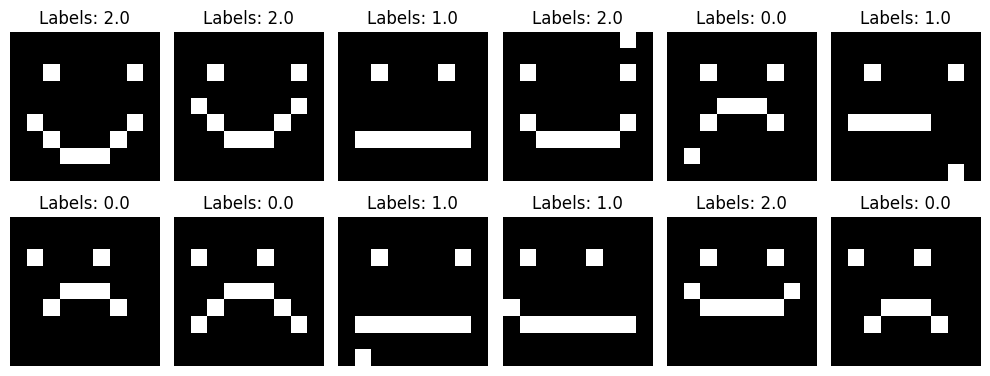

In [37]:
#selcet some random images from the dataset for visualization of the
indices =np.random.choice(len(X), size =12, replace = False)

#plot the selected imges
fig, axes = plt.subplots(2,6, figsize =(10,4))
axes = axes.flatten()
for  i, index in enumerate(indices):
    axes[i].imshow(X[index, :,:,0], cmap ="gray")
    axes[i].set_title(f"Labels: {Y[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Model training using Naive Bayes

In [9]:
#splitting our datse into traing and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)



In [10]:
#create an instance of naive bayes
naive_bayes = GaussianNB()

In [11]:

#Reshaping the training dataset and Training the naive bayes classifier 
naive_bayes.fit(X_train.reshape(X_train.shape[0], -1), Y_train)


GaussianNB()

In [12]:
#reshaping the testing dataset
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
#predicting 
y_predict = naive_bayes.predict(X_test_reshape)

In [13]:
# Getting the accuracy for the noiseless dataset
accuracy = accuracy_score(Y_test, y_predict)
print("Noiseless dataset accuracy:", accuracy)

Noiseless dataset accuracy: 0.6585365853658537


In [39]:
from sklearn.metrics import classification_report

# Getting the classification report for the test set of the noiseless dataset
evaluation = classification_report(Y_test, y_predict)
print("Classification Report (Noiseless Test Set):\n", evaluation)


Classification Report (Noiseless Test Set):
               precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [14]:
#generating the confusion matrix

confus_matrix = confusion_matrix(Y_test, y_predict)
print("confusion matrix: \n", confus_matrix)

confusion matrix: 
 [[10  4  1]
 [ 1  6  2]
 [ 0  6 11]]


In [15]:
#genarating other matices
tp_rate = confus_matrix[1,1]/(confus_matrix[1,1] + confus_matrix[1,0])
fp_rate = confus_matrix[0,1]/(confus_matrix[0,1] + confus_matrix[0,0])
precision = confus_matrix[1,1]/(confus_matrix[1,1] + confus_matrix[0,1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)

In [16]:
print("TP Rate: ", tp_rate)
print("FP Rate:", fp_rate)
print("Recall: ", recall)
print("F1 Measure: ", f_measure)

TP Rate:  0.8571428571428571
FP Rate: 0.2857142857142857
Recall:  0.8571428571428571
F1 Measure:  0.7058823529411764


In [17]:
#generating ROC 

if len(unique_Y) == 2:
    roc_area = roc_auc_score(Y_test, Y_predict)
else: #multi-class classification
    y_prob = naive_bayes.predict_proba(X_test_reshape)
    roc_area = roc_auc_score(Y_test, y_prob, multi_class='ovr')
print("ROC area:", roc_area)

ROC area: 0.8387867647058823


# Discussion and conclusion 

The visualization gives you a quick glimpse or insight of some images selected randomly from the dataset and their corresponding labels. In this visualization, there were no cases of missing values or outliers.
This can be helpful for understanding the data distribution and gaining insights into the dataset's characteristics. You can visually verify if the images are correctly labeled or if there are any patterns or variations in the data. Additionally, if the dataset is imbalanced (i.e., some classes have more samples than others), you might notice such imbalances in the visualization.

The accuracy of 65.86% suggests that the model's predictions are correct for a significant portion of the dataset. However, it may not be sufficient for certain applications, especially if there are imbalances in the class distribution.
The high TP Rate and Recall of 85.71% indicate that the model can correctly identify positive instances, which is important in tasks like disease diagnosis or anomaly detection.
The FP Rate of 28.57% shows that the model makes some false positive predictions, which may be acceptable depending on the specific application's requirements.
The F1 Measure of 70.59% indicates a reasonably balanced trade-off between precision and recall, considering both positive and negative instances.
The ROC area of 83.88% shows that the model performs well in distinguishing between positive and negative instances, implying good overall discrimination ability.

In conclusion, the model seems to perform well on the noiseless dataset, but further analysis and tuning might be needed to improve its performance on specific aspects depending on the specific application and requirements.

# Part 2: Clustering 

In [18]:
X_2d = X.reshape(X.shape[0], -1) #reshaping the dataset for clustering
#creating an instance of kmeans clustering
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans.fit(X_2d)
cluster_labels = kmeans.labels_

C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


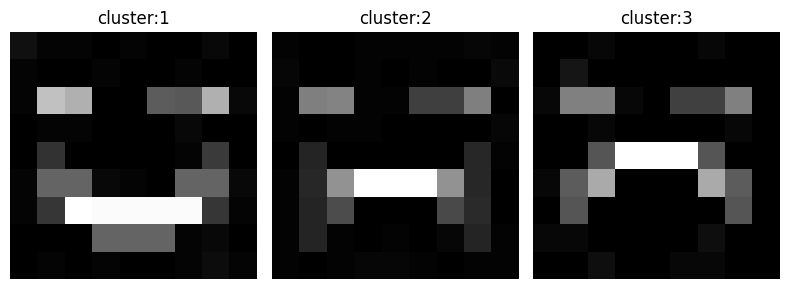

In [19]:
#getting the centroids
cluster_centers = kmeans.cluster_centers_

#image dimensions
img_height =9
img_width = 9
#plotting the centroids
plt.figure(figsize = (8,3))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, len(cluster_centers), i +1)
    plt.imshow(center.reshape((img_height, img_width)), cmap = 'gray')
    plt.axis('off')
    plt.title(f"cluster:{i + 1}")
plt.tight_layout()
plt.show()

In [20]:
#calculating the ARI for the cluster
kmeans_ari = adjusted_rand_score(Y, cluster_labels)
print(f"Adjusted Rand Index(ARI): {kmeans_ari}")

Adjusted Rand Index(ARI): 0.31288134543314644


In [21]:
#calculating the NMI score
kmeans_nmi = normalized_mutual_info_score(Y, cluster_labels)
#print the NMI score
print(f"NMI Score: {kmeans_nmi}")

NMI Score: 0.40829222303576546


In [22]:
#calculating the Hierarchical score
hierarchical = AgglomerativeClustering(n_clusters = 3)
hierarchical.fit(X_2d)
hierarchical_labels = hierarchical.labels_
hierarchical_ari = adjusted_rand_score(Y, hierarchical_labels)
print("Evaluation Metric Score:", hierarchical_ari)

Evaluation Metric Score: 0.31288134543314644


In [23]:
#implementing the GMM algorithm
#creating an instance of the GaussianMixture algorithm
gmm = GaussianMixture(n_components = 3, random_state = 42)
#fittting the Gmm to the data
gmm.fit(X_2d)
#getting the cluster labels
gmm_labels = gmm.predict(X_2d)
#calculating the ARI for the Gmm clustering
gmm_ari = adjusted_rand_score(Y, gmm_labels)
print(f"ARI for Gmm : {gmm_ari}")

C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ARI for Gmm : 0.06510301252674998


C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means: Number of Clusters: 2	 Silhouette Score: 0.17892954725892904	 ARI: 0.0900497790704178	 NMI Score:0.08562473128196435
EM Clustering: Number of Clusters: 2	 Silhouette Score: 0.17123347761650676	 ARI: 0.18221140002754235
Hierarchical Clustering: Number of Clusters: 2	 Silhouette Score: 0.17892954725892904	 ARI: 0.0900497790704178
 
K-means: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644	 NMI Score:0.40829222303576546
EM Clustering: Number of Clusters: 3	 Silhouette Score: 0.1588855656951513	 ARI: 0.06510301252674998
Hierarchical Clustering: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644
 
K-means: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172925633863	 NMI Score:0.40670370557149094
EM Clustering: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172925633863


C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

Hierarchical Clustering: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172925633863
 
K-means: Number of Clusters: 5	 Silhouette Score: 0.270787720845357	 ARI: 0.2515795409090252	 NMI Score:0.44192322380757576
EM Clustering: Number of Clusters: 5	 Silhouette Score: 0.2511342639969949	 ARI: 0.302549921377835
Hierarchical Clustering: Number of Clusters: 5	 Silhouette Score: 0.270787720845357	 ARI: 0.2515795409090252
 
K-means: Number of Clusters: 6	 Silhouette Score: 0.2729044590525549	 ARI: 0.3130655805478571	 NMI Score:0.4983172204690129


C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

EM Clustering: Number of Clusters: 6	 Silhouette Score: 0.26702304067628035	 ARI: 0.26008825509211936
Hierarchical Clustering: Number of Clusters: 6	 Silhouette Score: 0.2729044590525549	 ARI: 0.3130655805478571
 
K-means: Number of Clusters: 7	 Silhouette Score: 0.29172464458046876	 ARI: 0.26920712968653965	 NMI Score:0.47924515132811546
EM Clustering: Number of Clusters: 7	 Silhouette Score: 0.2388999622636098	 ARI: 0.22959776002185345
Hierarchical Clustering: Number of Clusters: 7	 Silhouette Score: 0.29172464458046876	 ARI: 0.26920712968653965
 


C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means: Number of Clusters: 8	 Silhouette Score: 0.28387905647115697	 ARI: 0.25490130841025394	 NMI Score:0.4482100778675968
EM Clustering: Number of Clusters: 8	 Silhouette Score: 0.2410375538232225	 ARI: 0.211857006596182
Hierarchical Clustering: Number of Clusters: 8	 Silhouette Score: 0.26785893418174106	 ARI: 0.26862742730980904
 
K-means: Number of Clusters: 9	 Silhouette Score: 0.260245802360912	 ARI: 0.23948938531982794	 NMI Score:0.4313086629444967
EM Clustering: Number of Clusters: 9	 Silhouette Score: 0.22939089048175	 ARI: 0.20465436896203917
Hierarchical Clustering: Number of Clusters: 9	 Silhouette Score: 0.27214670693336596	 ARI: 0.28978790525125747
 


C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OC\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


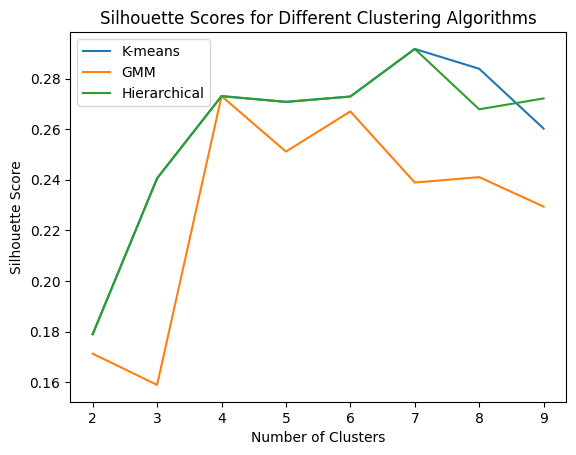

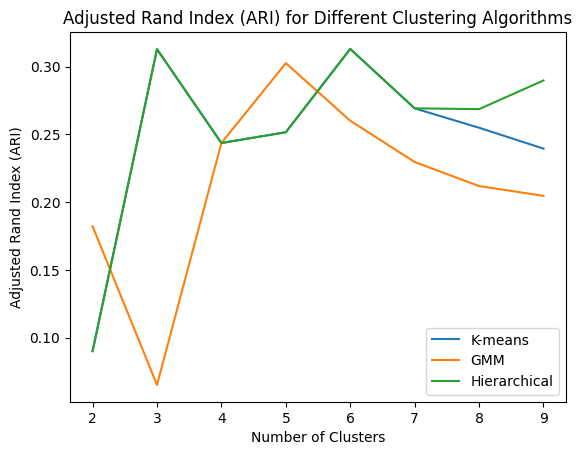

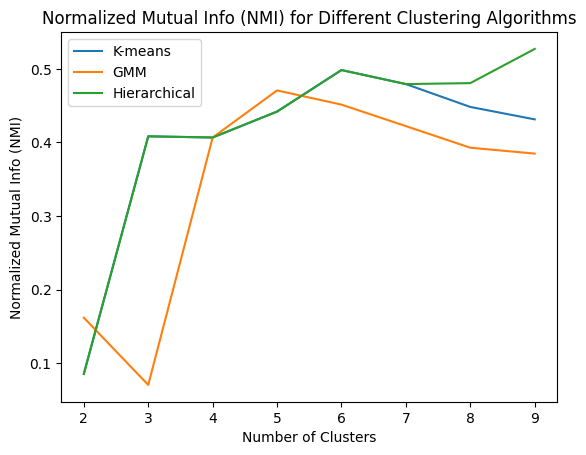

Best number of clusters for K-means: 7
Best number of clusters for GMM: 4
Best number of clusters for Hierarchical: 7


In [24]:
# Check the number of unique labels
num_unique_labels = len(set(Y))
if num_unique_labels < 2:
    print("Error!")
else:
    # Define the range of clusters to explore
    num_clusters_range = range(2, 10)

    # Initialize lists to store evaluation metric scores
    kmeans_silhouette_scores = []
    kmeans_ari_scores = []
    kmeans_nmi_scores=[]
    gmm_silhouette_scores = []
    gmm_ari_scores = []
    gmm_nmi_scores=[]
    hierarchical_silhouette_scores = []
    hierarchical_ari_scores = []
    hierarchical_nmi_scores=[]

    # Loop over different numbers of clusters
    for num_clusters in num_clusters_range:
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(X_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(X_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(Y, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(Y, kmeans_labels)
        kmeans_silhouette_scores.append(kmeans_silhouette)
        kmeans_ari_scores.append(kmeans_ari)
        kmeans_nmi_scores.append(kmeans_nmi)
        print(f"K-means: Number of Clusters: {num_clusters}\t Silhouette Score: {kmeans_silhouette}\t ARI: {kmeans_ari}\t NMI Score:{kmeans_nmi}")


        # EM clustering using GMM
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        gmm.fit(X_2d)
        gmm_labels = gmm.predict(X_2d)
        gmm_silhouette = silhouette_score(X_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(Y, gmm_labels)
        gmm_nmi = normalized_mutual_info_score(Y, gmm_labels)
        gmm_silhouette_scores.append(gmm_silhouette)
        gmm_ari_scores.append(gmm_ari)
        gmm_nmi_scores.append(gmm_nmi)
        print(f"EM Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {gmm_silhouette}\t ARI: {gmm_ari}")


        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(X_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(X_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(Y, hierarchical_labels)
        hierarchical_nmi = normalized_mutual_info_score(Y, hierarchical_labels)
        hierarchical_silhouette_scores.append(hierarchical_silhouette)
        hierarchical_ari_scores.append(hierarchical_ari)
        hierarchical_nmi_scores.append(hierarchical_nmi)
        print(f"Hierarchical Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {hierarchical_silhouette}\t ARI: {hierarchical_ari}\n ")


    # Visualize Silhouette Scores
    plt.plot(num_clusters_range, kmeans_silhouette_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_silhouette_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_silhouette_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.title('Silhouette Scores for Different Clustering Algorithms')
    plt.show()

    # Visualize ARI Scores
    plt.plot(num_clusters_range, kmeans_ari_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_ari_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_ari_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Adjusted Rand Index (ARI)')
    plt.legend()
    plt.title('Adjusted Rand Index (ARI) for Different Clustering Algorithms')
    plt.show()
    
    # Visualize NMI Scores
    plt.plot(num_clusters_range, kmeans_nmi_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_nmi_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_nmi_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Normalized Mutual Info (NMI)')
    plt.legend()
    plt.title('Normalized Mutual Info (NMI) for Different Clustering Algorithms')
    plt.show()

    # Draw Conclusions
    best_kmeans_num_clusters = num_clusters_range[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
    best_gmm_num_clusters = num_clusters_range[gmm_silhouette_scores.index(max(gmm_silhouette_scores))]
    best_hierarchical_num_clusters = num_clusters_range[hierarchical_silhouette_scores.index(max(hierarchical_silhouette_scores))]
    
    print(f"Best number of clusters for K-means: {best_kmeans_num_clusters}")
    print(f"Best number of clusters for GMM: {best_gmm_num_clusters}")
    print(f"Best number of clusters for Hierarchical: {best_hierarchical_num_clusters}")


# Discussion and conclusion

Clustering is performed using three different algorithms: K-means, Gaussian Mixture Model (GMM), and Hierarchical Clustering. The model evaluates the clustering performance using Silhouette Score, Adjusted Rand Index (ARI), and Normalized Mutual Info (NMI) for varying numbers of clusters. 

The clustering Visualization shows the visual representation of cluster centroids for K-means. Each centroid represents a cluster.
The visual representation provides a sense of how each cluster looks like, but it may not be meaningful for all datasets, especially when dealing with high-dimensional data.

ARI measures the similarity between true class labels and the predicted clusters, with 0 meaning random labeling and 1 indicating perfect clustering.
NMI measures the mutual information between true class labels and the predicted clusters, with 0 meaning no mutual information and 1 indicating perfect clustering.
best number of clusters for K-means, GMM, and Hierarchical Clustering based on the Silhouette Score.

The best number of clusters may vary for different datasets. It's important to select a number of clusters that makes sense based on the domain knowledge or further analysis.
Lastly, clustering performance is evaluated using multiple algorithms and evaluation metrics which helps in understanding the quality of clustering and assists in finding the optimal number of clusters for the given dataset. 

# Part3: Supervised learning

In [25]:
dtcl = DecisionTreeClassifier()

In [26]:
#measuring accuracy for the train set

#reshaping the input features
num_samples, img_height, img_width, num_channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, img_height * img_width * num_channels)

k = 10  # Number of folds for cross-validation
scores = cross_val_score(dtcl, X_train_reshaped, Y_train, cv=k)

In [27]:
print(f"Accuracy scores for each fold - \n {scores}")
print("Mean accuracy:", scores.mean())

Accuracy scores for each fold - 
 [1.     1.     1.     1.     1.     1.     1.     1.     0.9375 1.    ]
Mean accuracy: 0.99375


In [28]:
# Reshape the training set
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Reshape the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create an instance of DecisionTreeClassifier
dtcl = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
dtcl.fit(X_train_reshaped, Y_train)

# Use the fitted classifier to predict the labels for the test set
y_pred = dtcl.predict(X_test_reshaped)

# Calculate the accuracy of the classifier's predictions on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.975609756097561


In [29]:
precision = precision_score(Y_test, y_pred, average = "weighted")
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

F1 Score: 0.9758820554712724
Recall: 0.975609756097561
Precision: 0.9780487804878049


In [30]:
#calculating the depth of the decision tree

# Experiment with different parameters
parameters = [
    {"max_depth": 3},
    {"min_impurity_decrease": 0.01},
    {"criterion": "entropy"},
    {"min_samples_leaf": 5},
    {"ccp_alpha": 0.1}
]

# Loop over the parameters
for params in parameters:
    # Set the parameters for the classifier
    dtcl.set_params(**params)

    # Fit the classifier on the training set
    dtcl.fit(X_train_reshaped, Y_train)

    # Predict on the training set and calculate metrics
    Y_train_pred = dtcl.predict(X_train_reshaped)
    train_conf_mat = confusion_matrix(Y_train, Y_train_pred)
    train_TP = train_conf_mat[1, 1]
    train_FP = train_conf_mat[0, 1]
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_precision = precision_score(Y_train, Y_train_pred, average='macro')
    train_recall = recall_score(Y_train, Y_train_pred, average='macro')
    train_f1 = f1_score(Y_train, Y_train_pred, average='macro')

    # Predict on the test set and calculate metrics
    Y_test_pred = dtcl.predict(X_test_reshaped)
    test_conf_mat = confusion_matrix(Y_test, Y_test_pred)
    test_TP = test_conf_mat[1, 1]
    test_FP = test_conf_mat[0, 1]
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='macro')
    test_recall = recall_score(Y_test, Y_test_pred, average='macro')
    test_f1 = f1_score(Y_test, Y_test_pred, average='macro')

    # Print the results
    print("Parameters:", params)
    print("Training Set:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("TP:", train_TP)
    print("FP:", train_FP)
    print("F1 Score:", train_f1)
    print("Test Set:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("TP:", test_TP)
    print("FP:", test_FP)
    print("F1 Score:", test_f1)
    print("---------------------")

Parameters: {'max_depth': 3}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
TP: 40
FP: 11
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
TP: 8
FP: 0
F1 Score: 0.7936507936507936
---------------------
Parameters: {'min_impurity_decrease': 0.01}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
TP: 40
FP: 11
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
TP: 8
FP: 0
F1 Score: 0.7936507936507936
---------------------
Parameters: {'criterion': 'entropy'}
Training Set:
Accuracy: 0.7730061349693251
Precision: 0.8163650075414782
Recall: 0.7767457860337118
TP: 41
FP: 27
F1 Score: 0.7651324897775202
Test Set:
Accuracy: 0.7317073170731707
Precision: 0.7952069716775599
Recall: 0.7433551198257081
TP: 8
FP: 9
F1 Score: 0.7017325448697997
------

In [31]:
#Making new training and testing sets, by moving 30% of the instances from the original training set into the testing set.

#reshaping the imput data to have two dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a new training set and testing set with 30% instances in the testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_reshaped,Y_train, test_size=0.3, random_state=42)

# Create an instance of DecisionTreeClassifier
dtcl = DecisionTreeClassifier()

# Fit the decision tree classifier on the new training set
dtcl.fit(X_train_new, y_train_new)

# Evaluate accuracy on the training set
y_train_pred_new = dtcl.predict(X_train_new)
train_accuracy_new = accuracy_score(y_train_new, y_train_pred_new)

# Evaluate accuracy on the testing set
y_test_pred_new = dtcl.predict(X_test_new)
test_accuracy_new = accuracy_score(y_test_new, y_test_pred_new)

# Print the accuracies
print("Accuracies for 30% instances in testing set:")
print("Training Accuracy:", train_accuracy_new)
print("Testing Accuracy:", test_accuracy_new)

# Create a new training set and testing set with 60% instances in the testing set
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_train_reshaped, Y_train, test_size=0.6, random_state=42)

# Fit the decision tree classifier on the new training set
dtcl.fit(X_train_new2, y_train_new2)

# Evaluate accuracy on the training set
y_train_pred_new2 = dtcl.predict(X_train_new2)
train_accuracy_new2 = accuracy_score(y_train_new2, y_train_pred_new2)

# Evaluate accuracy on the testing set
y_test_pred_new2 = dtcl.predict(X_test_new2)
test_accuracy_new2 = accuracy_score(y_test_new2, y_test_pred_new2)

# Print the accuracies
print("Accuracies for 60% instances in testing set:")
print("Training Accuracy:", train_accuracy_new2)
print("Testing Accuracy:", test_accuracy_new2)

Accuracies for 30% instances in testing set:
Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracies for 60% instances in testing set:
Training Accuracy: 1.0
Testing Accuracy: 0.9897959183673469


# Discussion and conclusion

The provided code and results show the evaluation of a Decision Tree Classifier on a dataset. The model's performance is excellent, it performs exceptionally well on this dataset judging by its high accuracy, precision, recall, and F1 score on both the test set and cross-validation. The model performs very well on different subsets of the training data. It demonstrates robustness to changes in certain hyperparameter values, and even with a reduced dataset, it maintains high accuracy. However, further evaluation on a larger and more diverse dataset would be needed to ensure the model's generalization capabilities. Hyperparameter tuning could also be explored to optimize the model further. Overall, the Decision Tree Classifier appears to be a strong candidate for the given task based on the provided results.

# Part4: Neural Networks and Convolutional Neural Networks. 

In [32]:
from sklearn.metrics import mean_squared_error

# Reshaping the input data to have two dimensions

X_train_reshaped = X.reshape(X.shape[0], -1)

#X_test_reshaped = X.reshape(X.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train_reshaped, Y, test_size=0.2, random_state=42)

# Initialize the Linear classifier
linear_clf = LinearRegression()


# Fit the classifier on the training set
linear_clf.fit(X_train, Y_train)

# Predict on the training set and calculate MSE
y_train_pred_linear = linear_clf.predict(X_train)
train_mse_linear = mean_squared_error(Y_train, y_train_pred_linear)

# Predict on the test set and calculate MSE
y_test_pred_linear = linear_clf.predict(X_test)
test_mse_linear = mean_squared_error(Y_test, y_test_pred_linear)

# Print the test MSE without cross-validation
print("Linear Regression - Training Set (without cross-validation):")
print("Mean Squared Error (MSE):", test_mse_linear)

# Print the test MSE without cross-validation
print("Linear Regression - Test Set (without cross-validation):")
print("Mean Squared Error (MSE):", test_mse_linear)

Linear Regression - Training Set (without cross-validation):
Mean Squared Error (MSE): 6.973569304317321e+22
Linear Regression - Test Set (without cross-validation):
Mean Squared Error (MSE): 6.973569304317321e+22


In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the MLP classifier
mlp_clf = MLPClassifier(max_iter =500)

# Define the parameter grid for grid search
param_grid = {
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best MLP classifier
best_params = grid_search.best_params_
best_mlp_clf = grid_search.best_estimator_

# Fit the best MLP classifier on the training set
best_mlp_clf.fit(X_train, Y_train)

# Predict on the training set and calculate accuracy
y_train_pred_mlp = best_mlp_clf.predict(X_train)
train_accuracy_mlp = accuracy_score(Y_train, y_train_pred_mlp)

# Predict on the test set and calculate accuracy
y_test_pred_mlp = best_mlp_clf.predict(X_test)
test_accuracy_mlp = accuracy_score(Y_test, y_test_pred_mlp)

# Print the results
print("Multilayer Perceptron (MLP) - Best Parameters:")
print(best_params)

print("Multilayer Perceptron (MLP) - Training Set:")
print("Accuracy:", train_accuracy_mlp)

print("Multilayer Perceptron (MLP) - Test Set:")
print("Accuracy:", test_accuracy_mlp)

Multilayer Perceptron (MLP) - Best Parameters:
{'activation': 'relu', 'hidden_layer_sizes': (100, 50, 100), 'learning_rate_init': 0.001}
Multilayer Perceptron (MLP) - Training Set:
Accuracy: 1.0
Multilayer Perceptron (MLP) - Test Set:
Accuracy: 1.0


# Discussion and conclusion

The linear regression model performed poorly on the dataset, as seen from the extremely high mean squared error (MSE) on both the training and test sets.
The high MSE suggests that the linear model is not appropriate for this dataset, meaning that the relationship between the input features and the target variable is not linear.

A grid search was used to find the best hyperparameters for the MLP classifier, and the optimal parameters were {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 100), 'learning_rate_init': 0.001}.
The MLP classifier achieved perfect accuracy (1.0) on both the training and test sets, but this might be a sign of overfitting on the model and regularization techniques or adjusting the complexity of the model could be used to address this issue.

The linear regression model needs improvement, possibly by trying more sophisticated regression models or non-linear algorithms.

Additional evaluation metrics and further data exploration could help in refining the models' performance and generalization capabilities.
In conclusion, both models requires tuning and further refinement and to achieve better performance on new, or unseen data.